In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "Inference_Results/pythia-2.8B-MC/checkpoint-7080/"

shuffle = 1

df = pd.read_csv(data_dir + "mat_app_count.csv", index_col=0)

In [3]:
df

,Material,Application,count
0,microsilica,reinforced fibre,0
1,microsilica,supplementary cementitious material,10
2,microsilica,coarse aggregate,1
3,microsilica,pore forming agent,0
4,microsilica,filler,0
...,...,...,...
970,MSWI fly ash,lime-pozzolan cement,1
971,MSWI fly ash,lightweight aggregate,2
972,MSWI fly ash,additive,0
973,MSWI fly ash,fine aggregate,0


# MAT Centric Heatmap

## Select MAT

In [4]:
MAT_sub1 = ['coal fly ash', 'coal bottom ash', 'MSWI bottom ash', 'MSWI fly ash']

df_MAT_sub1 = df[df['Material'].isin(MAT_sub1)]

df_MAT_sub1 = df_MAT_sub1[~df_MAT_sub1['Application'].isin(["aggregate"])]

df_MAT_sub1 = df_MAT_sub1.replace("supplementary cementitious material", "SCM")

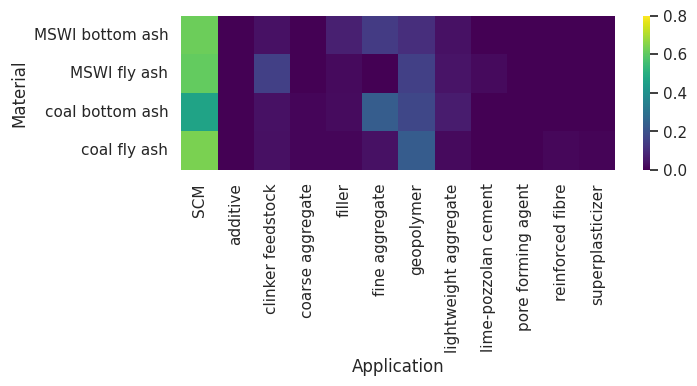

In [5]:
import seaborn as sns

data = df_MAT_sub1.pivot(index="Material", columns="Application", values="count")

data_norm_row = data.apply(lambda x: x/sum(x), axis = 1)

sns.set(rc={'figure.figsize':(7, 2)})

heatmap = sns.heatmap(data_norm_row, cmap="viridis", vmin=0.0, vmax=0.8, 
                      cbar_kws={'shrink': 1}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

fig.savefig("Figs/mat_app_heatmap_MAT_sub1.jpg", bbox_inches="tight")

In [6]:
data_norm_row

Application,SCM,additive,clinker feedstock,coarse aggregate,filler,fine aggregate,geopolymer,lightweight aggregate,lime-pozzolan cement,pore forming agent,reinforced fibre,superplasticizer
Material,,,,,,,,,,,,
MSWI bottom ash,0.620690,0.000000,0.034483,0.000000,0.068966,0.137931,0.103448,0.034483,0.000000,0.0,0.00000,0.000000
MSWI fly ash,0.608696,0.000000,0.152174,0.000000,0.021739,0.000000,0.152174,0.043478,0.021739,0.0,0.00000,0.000000
coal bottom ash,0.463415,0.000000,0.036585,0.012195,0.024390,0.231707,0.170732,0.060976,0.000000,0.0,0.00000,0.000000
coal fly ash,0.638043,0.002174,0.031522,0.009783,0.011957,0.034783,0.229348,0.021739,0.000000,0.0,0.01413,0.006522


# APP Centric Heatmap

## Select APP & MATs

In [7]:
APP_sub1 = ['SCM', 'geopolymer', 'fine aggregate', 'coarse aggregate']

df_APP_sub1 = df.replace("supplementary cementitious material", "SCM")

df_APP_sub1 = df_APP_sub1[df_APP_sub1['Application'].isin(APP_sub1)]

In [8]:
count_dict = df_APP_sub1.pivot(index="Application", columns="Material", values="count")
norm_count_dict = count_dict.apply(lambda x: x/sum(x), axis = 1).to_dict()

MATs = []
for APP in APP_sub1:
    MATs = MATs + [MAT for MAT in norm_count_dict.keys() if norm_count_dict[MAT][APP] > 0.02]

MATs = set(MATs)

df_APP_sub1 = df_APP_sub1[df_APP_sub1['Material'].isin(MATs)]

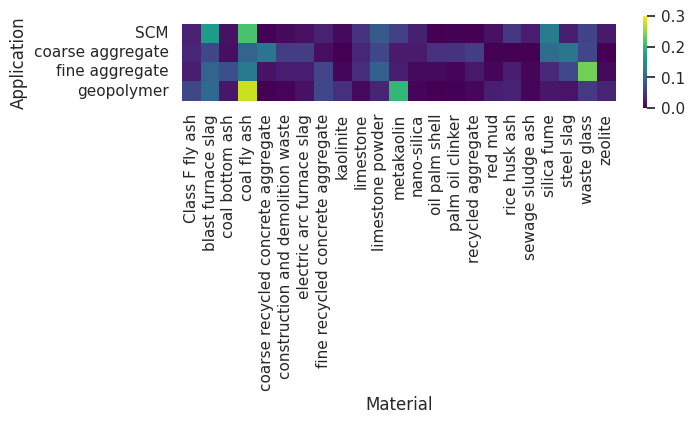

In [10]:
import seaborn as sns

data = df_APP_sub1.pivot(index="Application", columns="Material", values="count")

data_norm_row = data.apply(lambda x: x/sum(x), axis = 1)

sns.set(rc={'figure.figsize':(7, 1)})

heatmap = sns.heatmap(data_norm_row, cmap="viridis", vmin=0.0, vmax=0.3, 
                      cbar_kws={'shrink': 1.2}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

fig.savefig("Figs/mat_app_heatmap_APP_sub1.jpg", bbox_inches="tight")

In [51]:
data_norm_row

Material,Class F fly ash,blast furnace slag,coal bottom ash,coal fly ash,coarse recycled concrete aggregate,construction and demolition waste,electric arc furnace slag,fine recycled concrete aggregate,kaolinite,limestone,...,oil palm shell,palm oil clinker,recycled aggregate,red mud,rice husk ash,sewage sludge ash,silica fume,steel slag,waste glass,zeolite
Application,,,,,,,,,,,,,,,,,,,,,
SCM,0.027727,0.164538,0.013864,0.214155,0.002189,0.008026,0.012404,0.027362,0.007297,0.043050,...,0.000000,0.001824,0.000365,0.012039,0.048158,0.024444,0.123677,0.024808,0.059103,0.020430
coarse aggregate,0.031915,0.063830,0.010638,0.095745,0.117021,0.053191,0.053191,0.010638,0.000000,0.031915,...,0.042553,0.042553,0.053191,0.000000,0.000000,0.000000,0.106383,0.117021,0.063830,0.000000
fine aggregate,0.022814,0.095057,0.072243,0.121673,0.015209,0.022814,0.022814,0.060837,0.003802,0.038023,...,0.007605,0.003802,0.019011,0.003802,0.022814,0.003802,0.034221,0.064639,0.235741,0.007605
geopolymer,0.064220,0.100917,0.018349,0.276540,0.000000,0.002621,0.013106,0.064220,0.040629,0.007864,...,0.000000,0.001311,0.005242,0.024902,0.028834,0.003932,0.018349,0.015727,0.049803,0.030144


In [52]:
np.sum(data_norm_row.to_numpy(), axis=1)

array([1., 1., 1., 1.])

 # Raw Count

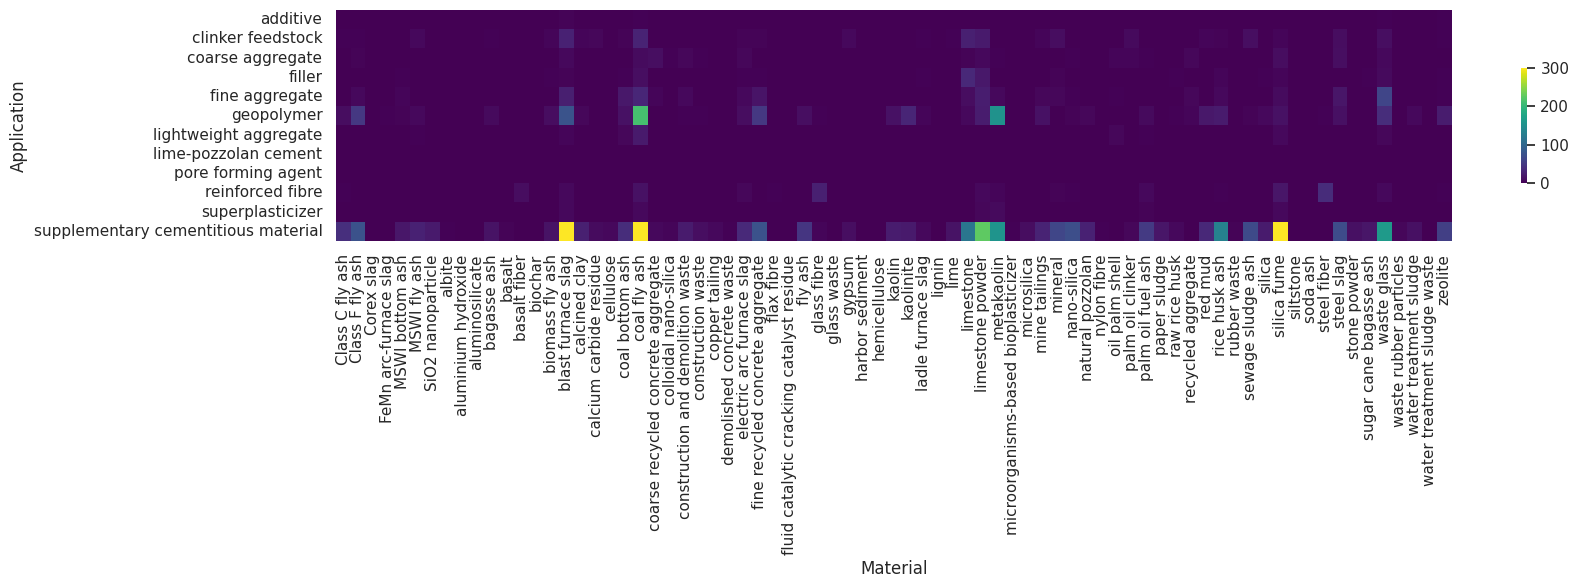

In [46]:
import seaborn as sns

data = df[~df["Application"].isin(["aggregate"])].pivot(index="Application", columns="Material", values="count")


sns.set(rc={'figure.figsize':(18,3)})

heatmap = sns.heatmap(data, cmap="viridis", vmax=300, 
                      cbar_kws={'shrink': 0.5}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

fig.savefig("Figs/mat_app_heatmap_rawCount.jpg", bbox_inches="tight")